# Analyzing New York City's Flood Dataset Metadata on NYC Open Data
Author: Mark Bauer

# Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime, timezone

sns.set_theme()
plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

Documention for installing watermark: https://github.com/rasbt/watermark.

In [2]:
%reload_ext watermark
%watermark -t -d -v -p pandas,sodapy

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

pandas: 1.4.3
sodapy: 2.1.1



# Socrata API
I used the Socrata API to retrieve metadata for datasets hosted on NYC Open Data. Documentation can be found here: https://dev.socrata.com/. Additionally, I used sodapy, the python client for the Socrata API, to query the metadata.

### Note:  
`WARNING:root:Requests made without an app_token will be subject to strict throttling limits.`

Read more from the SODA documentation here: https://dev.socrata.com/docs/app-tokens.html

# Quering Dataset Metadata on NYC Open Data

In [3]:
# source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

In [4]:
# socrata method to query metadata
client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# reading in a list of dictionaries of our data into a pandas DataFrame
df = pd.DataFrame.from_records(client.datasets())

# preview data
print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (3410, 8)


,resource,classification,metadata,permalink,link,owner,creator,preview_image_url
0,"{'name': 'Civil Service List (Active)', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/vx8i-nprf,https://data.cityofnewyork.us/City-Government/...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
1,"{'name': 'For Hire Vehicles (FHV) - Active', '...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/8wbx-tsch,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
2,"{'name': 'DOB Job Application Filings', 'id': ...","{'categories': ['economy', 'environment', 'hou...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/ic3t-wcy2,https://data.cityofnewyork.us/Housing-Developm...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
3,"{'name': 'TLC New Driver Application Status', ...","{'categories': ['transportation', 'environment...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/dpec-ucu7,https://data.cityofnewyork.us/Transportation/T...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
4,{'name': 'For Hire Vehicles (FHV) - Active Dri...,"{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/xjfq-wh2d,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN


In [5]:
# summarize df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   resource           3410 non-null   object
 1   classification     3410 non-null   object
 2   metadata           3410 non-null   object
 3   permalink          3410 non-null   object
 4   link               3410 non-null   object
 5   owner              3410 non-null   object
 6   creator            3410 non-null   object
 7   preview_image_url  138 non-null    object
dtypes: object(8)
memory usage: 213.2+ KB


In [6]:
# reading the dictionary in the resource column into a pandas DataFrame
df = pd.DataFrame.from_records(df['resource'])

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (3410, 25)


,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,blob_mime_type,hide_from_data_json,publication_date
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-01-05T14:39:40.000Z,2016-06-14T21:12:15.000Z,...,"[Text, Calendar date, Calendar date, Calendar ...",[A candidate’s first name as it appears on the...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",59245,official,tabular,table,None,False,2024-01-05T14:39:40.000Z
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T19:52:57.000Z,2015-07-16T17:33:32.000Z,...,"[Number, Text, Calendar date, Text, Text, Text...","[Vehicle Year, Base Type, Hack Up Date, Reason...","[{'precisionStyle': 'standard', 'noCommas': 't...",428538,official,tabular,table,None,False,2021-04-05T13:20:47.000Z
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-01-06T21:06:33.000Z,2013-04-18T15:18:56.000Z,...,"[Text, Text, Text, Text, Text, Text, Text, Tex...","[House Number of Property Owner, Sprinkler Wo...","[{'align': 'right'}, {'align': 'right'}, {'ali...",53461,official,tabular,table,None,False,2020-06-22T18:23:35.000Z
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T23:04:04.000Z,2016-05-17T18:43:43.000Z,...,"[Text, Text, Text, Number, Text, Text, Text, T...",[A NYS certified 6 hour Defensive Driving Cour...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",38609,official,tabular,table,None,False,2019-12-17T18:44:57.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T20:06:31.000Z,2015-07-16T17:24:02.000Z,...,"[Text, Calendar date, Calendar date, Text, Tex...","[WAV if Wheelchair Accessible Trained\n, Expir...","[{'displayStyle': 'plain', 'align': 'left'}, {...",374501,official,tabular,table,None,False,2024-01-06T20:06:31.000Z


In [7]:
# summarize df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3410 non-null   object
 1   id                   3410 non-null   object
 2   parent_fxf           3410 non-null   object
 3   description          3410 non-null   object
 4   attribution          3210 non-null   object
 5   attribution_link     454 non-null    object
 6   contact_email        0 non-null      object
 7   type                 3410 non-null   object
 8   updatedAt            3410 non-null   object
 9   createdAt            3410 non-null   object
 10  metadata_updated_at  3410 non-null   object
 11  data_updated_at      3223 non-null   object
 12  page_views           3410 non-null   object
 13  columns_name         3410 non-null   object
 14  columns_field_name   3410 non-null   object
 15  columns_datatype     3410 non-null   object
 16  column

In [8]:
# preview first 15 columns
df.iloc[:5, :15]

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,metadata_updated_at,data_updated_at,page_views,columns_name,columns_field_name
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-01-05T14:39:40.000Z,2016-06-14T21:12:15.000Z,2024-01-05T14:39:40.000Z,2024-01-05T14:24:44.000Z,"{'page_views_last_week': 5170, 'page_views_las...","[First Name, Anniversary Date, Established Dat...","[first_name, anniversary_date, established_dat..."
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T19:52:57.000Z,2015-07-16T17:33:32.000Z,2022-09-06T21:05:32.000Z,2024-01-06T19:52:57.000Z,"{'page_views_last_week': 8118, 'page_views_las...","[Vehicle Year, Base Type, Hack Up Date, Reason...","[vehicle_year, base_type, hack_up_date, reason..."
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-01-06T21:06:33.000Z,2013-04-18T15:18:56.000Z,2020-06-23T02:08:44.000Z,2024-01-06T21:06:33.000Z,"{'page_views_last_week': 486, 'page_views_last...","[Owner's House Number, Sprinkler, Fire Suppres...","[owner_s_house_number, sprinkler, fire_suppres..."
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T23:04:04.000Z,2016-05-17T18:43:43.000Z,2022-05-09T22:28:03.000Z,2024-01-06T23:04:04.000Z,"{'page_views_last_week': 194, 'page_views_last...","[Defensive Driving, Type, Status, App No, Othe...","[defensive_driving, type, status, app_no, othe..."
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T20:06:31.000Z,2015-07-16T17:24:02.000Z,2024-01-06T20:06:31.000Z,2024-01-06T20:00:24.000Z,"{'page_views_last_week': 2875, 'page_views_las...","[Wheelchair Accessible Trained, Expiration Dat...","[wheelchair_accessible_trained, expiration_dat..."


In [9]:
# preview columns starting at col index 15
df.iloc[:5, 15:]

,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,blob_mime_type,hide_from_data_json,publication_date
0,"[Text, Calendar date, Calendar date, Calendar ...",[A candidate’s first name as it appears on the...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",59245,official,tabular,table,None,False,2024-01-05T14:39:40.000Z
1,"[Number, Text, Calendar date, Text, Text, Text...","[Vehicle Year, Base Type, Hack Up Date, Reason...","[{'precisionStyle': 'standard', 'noCommas': 't...",428538,official,tabular,table,None,False,2021-04-05T13:20:47.000Z
2,"[Text, Text, Text, Text, Text, Text, Text, Tex...","[House Number of Property Owner, Sprinkler Wo...","[{'align': 'right'}, {'align': 'right'}, {'ali...",53461,official,tabular,table,None,False,2020-06-22T18:23:35.000Z
3,"[Text, Text, Text, Number, Text, Text, Text, T...",[A NYS certified 6 hour Defensive Driving Cour...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",38609,official,tabular,table,None,False,2019-12-17T18:44:57.000Z
4,"[Text, Calendar date, Calendar date, Text, Tex...","[WAV if Wheelchair Accessible Trained\n, Expir...","[{'displayStyle': 'plain', 'align': 'left'}, {...",374501,official,tabular,table,None,False,2024-01-06T20:06:31.000Z


In [10]:
# explode page_view column and expand elements inside as new columns
df = pd.concat(
    [df.drop(['page_views'], axis=1), df['page_views'].apply(pd.Series)],
    axis=1
)

# preview data
df.head()

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,lens_display_type,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-01-05T14:39:40.000Z,2016-06-14T21:12:15.000Z,...,table,None,False,2024-01-05T14:39:40.000Z,5170.0,23942.0,2526873.0,12.336228,14.547316,21.268922
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T19:52:57.000Z,2015-07-16T17:33:32.000Z,...,table,None,False,2021-04-05T13:20:47.000Z,8118.0,35374.0,2510941.0,12.987086,15.110443,21.259797
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-01-06T21:06:33.000Z,2013-04-18T15:18:56.000Z,...,table,None,False,2020-06-22T18:23:35.000Z,486.0,1742.0,2339278.0,8.927778,10.767357,21.157633
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T23:04:04.000Z,2016-05-17T18:43:43.000Z,...,table,None,False,2019-12-17T18:44:57.000Z,194.0,940.0,1724193.0,7.607330,9.878051,20.717491
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T20:06:31.000Z,2015-07-16T17:24:02.000Z,...,table,None,False,2024-01-06T20:06:31.000Z,2875.0,12341.0,1352271.0,11.489848,13.591289,20.366954


In [11]:
# summarize df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3410 non-null   object 
 1   id                         3410 non-null   object 
 2   parent_fxf                 3410 non-null   object 
 3   description                3410 non-null   object 
 4   attribution                3210 non-null   object 
 5   attribution_link           454 non-null    object 
 6   contact_email              0 non-null      object 
 7   type                       3410 non-null   object 
 8   updatedAt                  3410 non-null   object 
 9   createdAt                  3410 non-null   object 
 10  metadata_updated_at        3410 non-null   object 
 11  data_updated_at            3223 non-null   object 
 12  columns_name               3410 non-null   object 
 13  columns_field_name         3410 non-null   objec

In [12]:
# preview first 15 columns
df.iloc[:5, :15]

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,metadata_updated_at,data_updated_at,columns_name,columns_field_name,columns_datatype
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-01-05T14:39:40.000Z,2016-06-14T21:12:15.000Z,2024-01-05T14:39:40.000Z,2024-01-05T14:24:44.000Z,"[First Name, Anniversary Date, Established Dat...","[first_name, anniversary_date, established_dat...","[Text, Calendar date, Calendar date, Calendar ..."
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T19:52:57.000Z,2015-07-16T17:33:32.000Z,2022-09-06T21:05:32.000Z,2024-01-06T19:52:57.000Z,"[Vehicle Year, Base Type, Hack Up Date, Reason...","[vehicle_year, base_type, hack_up_date, reason...","[Number, Text, Calendar date, Text, Text, Text..."
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-01-06T21:06:33.000Z,2013-04-18T15:18:56.000Z,2020-06-23T02:08:44.000Z,2024-01-06T21:06:33.000Z,"[Owner's House Number, Sprinkler, Fire Suppres...","[owner_s_house_number, sprinkler, fire_suppres...","[Text, Text, Text, Text, Text, Text, Text, Tex..."
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T23:04:04.000Z,2016-05-17T18:43:43.000Z,2022-05-09T22:28:03.000Z,2024-01-06T23:04:04.000Z,"[Defensive Driving, Type, Status, App No, Othe...","[defensive_driving, type, status, app_no, othe...","[Text, Text, Text, Number, Text, Text, Text, T..."
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T20:06:31.000Z,2015-07-16T17:24:02.000Z,2024-01-06T20:06:31.000Z,2024-01-06T20:00:24.000Z,"[Wheelchair Accessible Trained, Expiration Dat...","[wheelchair_accessible_trained, expiration_dat...","[Text, Calendar date, Calendar date, Text, Tex..."


In [13]:
# preview columns starting at col index 15
df.iloc[:5, 15:]

,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,[A candidate’s first name as it appears on the...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",59245,official,tabular,table,None,False,2024-01-05T14:39:40.000Z,5170.0,23942.0,2526873.0,12.336228,14.547316,21.268922
1,"[Vehicle Year, Base Type, Hack Up Date, Reason...","[{'precisionStyle': 'standard', 'noCommas': 't...",428538,official,tabular,table,None,False,2021-04-05T13:20:47.000Z,8118.0,35374.0,2510941.0,12.987086,15.110443,21.259797
2,"[House Number of Property Owner, Sprinkler Wo...","[{'align': 'right'}, {'align': 'right'}, {'ali...",53461,official,tabular,table,None,False,2020-06-22T18:23:35.000Z,486.0,1742.0,2339278.0,8.927778,10.767357,21.157633
3,[A NYS certified 6 hour Defensive Driving Cour...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",38609,official,tabular,table,None,False,2019-12-17T18:44:57.000Z,194.0,940.0,1724193.0,7.607330,9.878051,20.717491
4,"[WAV if Wheelchair Accessible Trained\n, Expir...","[{'displayStyle': 'plain', 'align': 'left'}, {...",374501,official,tabular,table,None,False,2024-01-06T20:06:31.000Z,2875.0,12341.0,1352271.0,11.489848,13.591289,20.366954


In [14]:
# convert datatypes of desired columns
cols_dict = {
    'download_count':int,
    'page_views_last_week':int,
    'page_views_last_month':int,
    'page_views_total':int, 
}

df = df.astype(cols_dict)

# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3410 non-null   object 
 1   id                         3410 non-null   object 
 2   parent_fxf                 3410 non-null   object 
 3   description                3410 non-null   object 
 4   attribution                3210 non-null   object 
 5   attribution_link           454 non-null    object 
 6   contact_email              0 non-null      object 
 7   type                       3410 non-null   object 
 8   updatedAt                  3410 non-null   object 
 9   createdAt                  3410 non-null   object 
 10  metadata_updated_at        3410 non-null   object 
 11  data_updated_at            3223 non-null   object 
 12  columns_name               3410 non-null   object 
 13  columns_field_name         3410 non-null   objec

In [15]:
# get today's date
today = datetime.now(timezone.utc)

# convert to datetime
df['createdAt'] = pd.to_datetime(df['createdAt'])

# calculate days elapsed and format date column
df['days_elapsed'] = (today - df['createdAt']).dt.days
df['created_date'] = df['createdAt'].dt.strftime('%Y-%m-%d')

# normalize counts
df['download_per_day'] = round(df['download_count'] / df['days_elapsed'], 2)
df['page_views_per_day'] = round(df['page_views_total'] / df['days_elapsed'], 2)

df['downloads_and_views'] = df['download_count'] + df['page_views_total']
df['downloads_and_views_per_day'] = round(df['downloads_and_views'] / df['days_elapsed'], 2)

# preview data
df.head()

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,created_date,download_per_day,page_views_per_day,downloads_and_views,downloads_and_views_per_day
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-01-05T14:39:40.000Z,2016-06-14 21:12:15+00:00,...,2526873,12.336228,14.547316,21.268922,2762,2016-06-14,21.45,914.87,2586118,936.32
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T19:52:57.000Z,2015-07-16 17:33:32+00:00,...,2510941,12.987086,15.110443,21.259797,3096,2015-07-16,138.42,811.03,2939479,949.44
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-01-06T21:06:33.000Z,2013-04-18 15:18:56+00:00,...,2339278,8.927778,10.767357,21.157633,3915,2013-04-18,13.66,597.52,2392739,611.17
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T23:04:04.000Z,2016-05-17 18:43:43+00:00,...,1724193,7.607330,9.878051,20.717491,2790,2016-05-17,13.84,617.99,1762802,631.83
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-06T20:06:31.000Z,2015-07-16 17:24:02+00:00,...,1352271,11.489848,13.591289,20.366954,3096,2015-07-16,120.96,436.78,1726772,557.74


# CSV of Datasets

For metadata analysis, we exclude the datasets below, as they are not flood specific and are used in many other contexts.
- 311 Service Requests from 2010 to Present
- Building Footprints
- Primary Land Use Tax Lot Output - Map (MapPLUTO)
- Emergency Response Incidents
- NYCEM Emergency Notifications
- Incidents Responded to by Fire Companies
- Street Construction Permits (2013-2021)
- Street Construction Permits (2022-Present)

If you're curious how to examine some of the datasets above, please visit the [searchstring-flood.ipynb](https://github.com/mebauer/nyc-flood-data/blob/main/searchstring-flood.ipynb) notebook in this repository.

In [16]:
# read in id, name of flood datasets
datasets_df = pd.read_csv('datasets.csv')

# preview flood datasets
datasets_df

,id,name
0,uyj8-7rv5,Sandy Inundation Zone
1,7r5q-vr7p,NYC Stormwater Flood Map - Moderate Flood with...
2,5rzh-cyqd,NYC Stormwater Flood Map - Moderate Flood with...
3,w8eg-8ha6,NYC Stormwater Flood Map - Extreme Flood with ...
4,6an6-9htp,Projected Sea Level Rise
5,ezfn-5dsb,Sea Level Rise Maps (2020s 100-year Floodplain)
6,ajyu-7sgg,Sea Level Rise Maps (2020s 500-year Floodplain)
7,hbw8-2bah,Sea Level Rise Maps (2050s 100-year Floodplain)
8,qwca-zqw3,Sea Level Rise Maps (2050s 500-year Floodplain)
9,3vjp-ybhy,2050s Mean Sea Level


In [17]:
# assign flood dataset ids as list
ids = datasets_df['id'].values

# select flood dataset ids in df
df = (
    df
    .loc[df['id'].isin(ids)]
    .reset_index(drop=True)
)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (29, 36)


,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,created_date,download_per_day,page_views_per_day,downloads_and_views,downloads_and_views_per_day
0,Sandy Inundation Zone,uyj8-7rv5,[],Areas of New York City that were flooded as a ...,Department of Small Business Services (SBS),None,None,map,2023-12-13T02:12:05.000Z,2015-11-09 23:21:21+00:00,...,53576,6.169925,8.836050,15.709326,2980,2015-11-09,6.81,17.98,73865,24.79
1,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,[],This is the 500-Year Floodplain for the 2050s ...,Mayor's Office of Climate and Sustainability,None,None,map,2021-09-16T16:38:40.000Z,2013-07-23 21:56:45+00:00,...,42653,7.357552,9.616549,15.380393,3819,2013-07-23,0.63,11.17,45067,11.80
2,1 foot Digital Elevation Model (DEM),dpc8-z3jc,[],NYC 1foot Digital Elevation Model:\r\nA bare-e...,Office of Technology and Innovation (OTI),None,None,href,2022-09-23T19:23:09.000Z,2013-08-09 23:09:58+00:00,...,32218,6.087463,8.308339,14.975624,3802,2013-08-09,1.72,8.47,38742,10.19
3,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,[],This is the 100-Year Floodplain for the 2020s ...,Mayor's Office of Climate and Sustainability,None,None,map,2021-09-16T16:43:22.000Z,2013-07-23 21:05:21+00:00,...,26065,7.044394,8.721099,14.669882,3819,2013-07-23,55.42,6.83,237728,62.25
4,DEP Green Infrastructure,spjh-pz7h,[],NYC Green Infrastructure Program initiatives. ...,Department of Environmental Protection (DEP),None,None,map,2023-12-13T02:19:50.000Z,2017-08-31 20:33:51+00:00,...,14872,6.523562,8.447083,13.860408,2319,2017-08-31,11.99,6.41,42668,18.40


In [18]:
# quick table of agencies and counts of data
(df
 .groupby(by='attribution')['id']
 .count()
 .rename('count')
 .sort_values(ascending=False)
 .reset_index()
)

,attribution,count
0,Mayor's Office of Climate Resiliency,7
1,NYC Emergency Management (NYCEM),7
2,Department of Environmental Protection (DEP),4
3,Mayor's Office of Climate and Sustainability,4
4,Office of Technology and Innovation (OTI),2
5,Department of City Planning (DCP),1
6,Department of Small Business Services (SBS),1
7,NYC Management Department (NYCEM),1


Table xx: Count of datasets related to flooding by agency on NYC Open Data.

# Top Dataset Statistics
Note: We convert table to markdown and copy/paste to README.

In [19]:
# defining function to return table

def table(df, sort_by, columns):
    """
    Generate a table from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - sort_by (str): The column name to sort the DataFrame by.
    - columns (list): A list of column names to include in the resulting table.

    Returns:
    pd.DataFrame: A table containing the top 10 rows of the input DataFrame,
        sorted by the specified column, and including only the specified columns.
        The index is reset and set to a range from 1 to 10.
    """
    
    table_df  = (
        df
        .sort_values(by=sort_by, ascending=False)
        .loc[:, columns]
        .head(10)
        .reset_index(drop=True)
        .set_index([pd.Series(range(1, 11))])
    )
    
    table_df.index.names = ['rank']
    
    return table_df

## Downloads

In [20]:
cols = [
    'name', 'id', 'created_date',
    'download_count', 'download_per_day'
]

downloads_df = table(df, sort_by='download_count', columns=cols)

downloads_df

,name,id,created_date,download_count,download_per_day
rank,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,230880,441.45
2,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,211663,55.42
3,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,41530,13.41
4,DEP Green Infrastructure,spjh-pz7h,2017-08-31,27796,11.99
5,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,20289,6.81
6,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,6524,1.72
7,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,3522,1.90
8,NYC Stormwater Flood Map - Extreme Flood with ...,w8eg-8ha6,2021-06-07,3003,3.18
9,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,2541,0.67


Table xx: Top 10 flood datasets by total downloads on NYC Open Data.

In [21]:
print(downloads_df.to_markdown())

|   rank | name                                                              | id        | created_date   |   download_count |   download_per_day |
|-------:|:------------------------------------------------------------------|:----------|:---------------|-----------------:|-------------------:|
|      1 | Hurricane Evacuation Centers (Map)                                | ayer-cga7 | 2022-08-01     |           230880 |             441.45 |
|      2 | Sea Level Rise Maps (2020s 100-year Floodplain)                   | ezfn-5dsb | 2013-07-23     |           211663 |              55.42 |
|      3 | Hurricane Evacuation Zones                                        | uihr-hn7s | 2015-07-14     |            41530 |              13.41 |
|      4 | DEP Green Infrastructure                                          | spjh-pz7h | 2017-08-31     |            27796 |              11.99 |
|      5 | Sandy Inundation Zone                                             | uyj8-7rv5 | 2015-11-09     |     

In [22]:
cols = [
    'name', 'id', 'created_date',
    'download_count', 'download_per_day'
]

downloads_day = table(df, sort_by='download_per_day', columns=cols)

downloads_day

,name,id,created_date,download_count,download_per_day
rank,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,230880,441.45
2,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,211663,55.42
3,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,41530,13.41
4,DEP Green Infrastructure,spjh-pz7h,2017-08-31,27796,11.99
5,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,20289,6.81
6,NYC Stormwater Flood Map - Moderate Flood with...,7r5q-vr7p,2022-08-17,2089,4.12
7,NYC Stormwater Flood Map - Extreme Flood with ...,w8eg-8ha6,2021-06-07,3003,3.18
8,Building Elevation and Subgrade (BES),bsin-59hv,2023-09-12,258,2.22
9,NYC Stormwater Flood Map - Moderate Flood with...,5rzh-cyqd,2021-06-07,1847,1.96


Table xx: Top 10 flood datasets by total downloads per day on NYC Open Data.

## Page Views

In [23]:
cols  = [
    'name', 'id', 'created_date',
    'page_views_per_day', 'page_views_last_week',
    'page_views_last_month', 'page_views_total'
]

views_df = table(df, sort_by='page_views_total', columns=cols)

views_df

,name,id,created_date,page_views_per_day,page_views_last_week,page_views_last_month,page_views_total
rank,,,,,,,
1,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,17.98,71,456,53576
2,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,11.17,163,784,42653
3,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,8.47,67,316,32218
4,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,6.83,131,421,26065
5,DEP Green Infrastructure,spjh-pz7h,2017-08-31,6.41,91,348,14872
6,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,3.32,37,100,10288
7,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,2.68,105,216,10246
8,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,5.00,21,211,9273
9,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,16.37,19,87,8562


Table xx: Top 10 flood datasets by total page views on NYC Open Data.

In [24]:
print(views_df.to_markdown())

|   rank | name                                                              | id        | created_date   |   page_views_per_day |   page_views_last_week |   page_views_last_month |   page_views_total |
|-------:|:------------------------------------------------------------------|:----------|:---------------|---------------------:|-----------------------:|------------------------:|-------------------:|
|      1 | Sandy Inundation Zone                                             | uyj8-7rv5 | 2015-11-09     |                17.98 |                     71 |                     456 |              53576 |
|      2 | Sea Level Rise Maps (2050s 500-year Floodplain)                   | qwca-zqw3 | 2013-07-23     |                11.17 |                    163 |                     784 |              42653 |
|      3 | 1 foot Digital Elevation Model (DEM)                              | dpc8-z3jc | 2013-08-09     |                 8.47 |                     67 |                     316 |       

In [25]:
cols = [
    'name', 'id', 'created_date',
    'page_views_per_day', 'page_views_last_week',
    'page_views_last_month', 'page_views_total'
]

views_day = table(df, sort_by='page_views_per_day', columns=cols)

views_day

,name,id,created_date,page_views_per_day,page_views_last_week,page_views_last_month,page_views_total
rank,,,,,,,
1,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,17.98,71,456,53576
2,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,16.37,19,87,8562
3,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,11.17,163,784,42653
4,Building Elevation and Subgrade (BES),bsin-59hv,2023-09-12,9.24,18,78,1072
5,NYC Stormwater Flood Map - Moderate Flood with...,7r5q-vr7p,2022-08-17,8.63,23,199,4376
6,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,8.47,67,316,32218
7,NYC Stormwater Flood Map - Extreme Flood with ...,w8eg-8ha6,2021-06-07,7.56,48,167,7132
8,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,6.83,131,421,26065
9,DEP Green Infrastructure,spjh-pz7h,2017-08-31,6.41,91,348,14872


Table xx: Top 10 flood datasets by total page views per day on NYC Open Data.

## Downloads and Page Views

In [26]:
cols = [
    'name', 'id', 'created_date',
    'download_count', 'page_views_total', 'downloads_and_views'
]

total = table(df, sort_by='downloads_and_views', columns=cols)

total

,name,id,created_date,download_count,page_views_total,downloads_and_views
rank,,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,230880,8562,239442
2,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,211663,26065,237728
3,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,20289,53576,73865
4,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,41530,10288,51818
5,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,2414,42653,45067
6,DEP Green Infrastructure,spjh-pz7h,2017-08-31,27796,14872,42668
7,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,6524,32218,38742
8,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,3522,9273,12795
9,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,2541,10246,12787


Table xx: Top 10 flood datasets by total downloads and page views on NYC Open Data.

In [27]:
print(total.to_markdown())

|   rank | name                                                              | id        | created_date   |   download_count |   page_views_total |   downloads_and_views |
|-------:|:------------------------------------------------------------------|:----------|:---------------|-----------------:|-------------------:|----------------------:|
|      1 | Hurricane Evacuation Centers (Map)                                | ayer-cga7 | 2022-08-01     |           230880 |               8562 |                239442 |
|      2 | Sea Level Rise Maps (2020s 100-year Floodplain)                   | ezfn-5dsb | 2013-07-23     |           211663 |              26065 |                237728 |
|      3 | Sandy Inundation Zone                                             | uyj8-7rv5 | 2015-11-09     |            20289 |              53576 |                 73865 |
|      4 | Hurricane Evacuation Zones                                        | uihr-hn7s | 2015-07-14     |            41530 |              

In [28]:
cols = [
    'name', 'id', 'created_date',
    'downloads_and_views', 'downloads_and_views_per_day'
]

total_per_day = table(df, sort_by='downloads_and_views_per_day', columns=cols)

total_per_day

,name,id,created_date,downloads_and_views,downloads_and_views_per_day
rank,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,239442,457.82
2,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,237728,62.25
3,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,73865,24.79
4,DEP Green Infrastructure,spjh-pz7h,2017-08-31,42668,18.40
5,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,51818,16.73
6,NYC Stormwater Flood Map - Moderate Flood with...,7r5q-vr7p,2022-08-17,6465,12.75
7,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,45067,11.80
8,Building Elevation and Subgrade (BES),bsin-59hv,2023-09-12,1330,11.47
9,NYC Stormwater Flood Map - Extreme Flood with ...,w8eg-8ha6,2021-06-07,10135,10.75


Table xx: Top 10 flood datasets by total downloads and page views per day on NYC Open Data.

# Relationship Plots

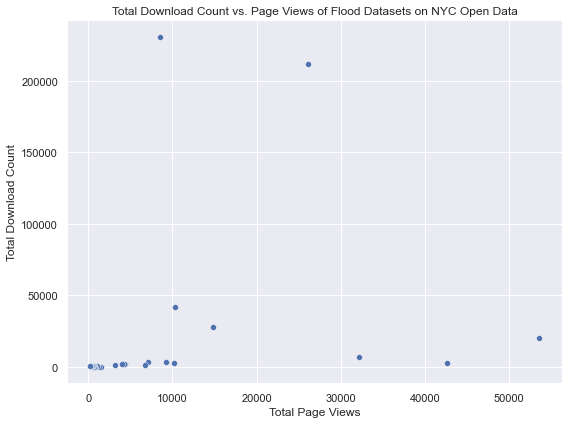

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['page_views_total'],
    y=df['download_count'],
    ax=ax
)

plt.title('Total Download Count vs. Page Views of Flood Datasets on NYC Open Data')
plt.xlabel('Total Page Views')
plt.ylabel('Total Download Count')

plt.tight_layout()

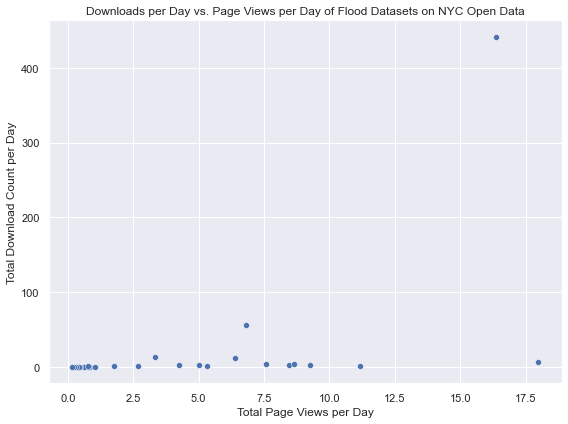

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['page_views_per_day'],
    y=df['download_per_day'],
    ax=ax
)

plt.title('Downloads per Day vs. Page Views per Day of Flood Datasets on NYC Open Data')
plt.xlabel('Total Page Views per Day')
plt.ylabel('Total Download Count per Day')

plt.tight_layout()

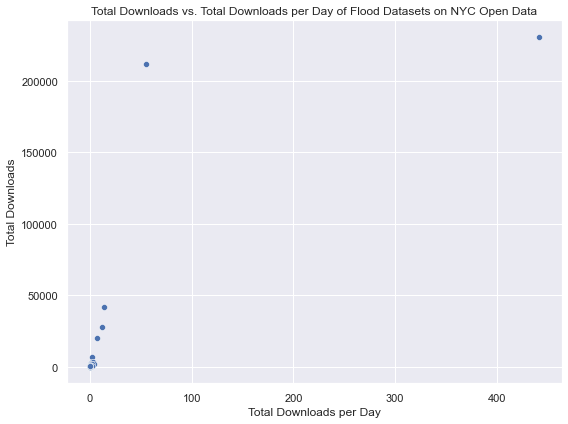

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['download_per_day'],
    y=df['download_count'],
    ax=ax
)

plt.title('Total Downloads vs. Total Downloads per Day of Flood Datasets on NYC Open Data')
plt.xlabel('Total Downloads per Day')
plt.ylabel('Total Downloads')

plt.tight_layout()

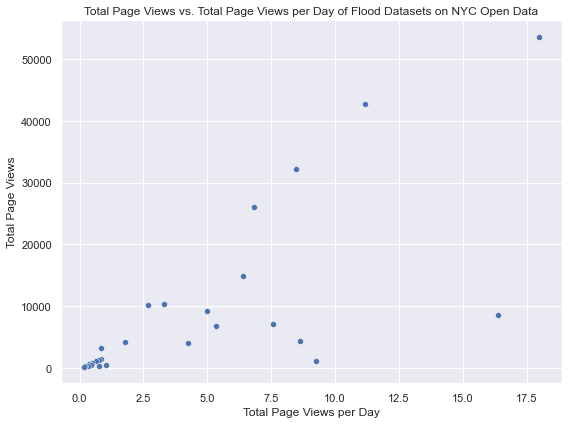

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['page_views_per_day'],
    y=df['page_views_total'],
    ax=ax
)

plt.title('Total Page Views vs. Total Page Views per Day of Flood Datasets on NYC Open Data')
plt.xlabel('Total Page Views per Day')
plt.ylabel('Total Page Views')

plt.tight_layout()